# Neural Dimensionality Estimation

### Set-up + Imports

In [80]:
import setup

setup.main()
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import neurometry.datasets.synthetic as synthetic
import numpy as np
import skdim

import matplotlib.pyplot as plt


import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

import plotly.graph_objects as go
from plotly.subplots import make_subplots

Working directory:  /Users/facosta/Desktop/code/neurometry/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry/neurometry
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [59]:
num_points = 1000
intrinsic_dim = 1
num_neurons = 6
poisson_multiplier = 1000

torus_points = synthetic.hypertorus(intrinsic_dim, num_points)
neural_torus, _ = synthetic.synthetic_neural_manifold(
    torus_points,
    num_neurons,
    "sigmoid",
    poisson_multiplier,
    scales=gs.ones(num_neurons),
)

In [109]:
danco = skdim.id.DANCo().fit(neural_torus)
lpca = skdim.id.lPCA().fit_pw(neural_torus, n_neighbors=100, n_jobs=1)
ess = skdim.id.ESS().fit(neural_torus, n_neighbors=100, n_jobs=1)
fishers = skdim.id.FisherS().fit(neural_torus)
knn = skdim.id.KNN().fit(neural_torus)
mada = skdim.id.MADA().fit(neural_torus)
mind_ml = skdim.id.MiND_ML().fit(neural_torus)
mle = skdim.id.MLE().fit(neural_torus)
mom = skdim.id.MOM().fit(neural_torus)
tle = skdim.id.TLE().fit(neural_torus)
twonn = skdim.id.TwoNN().fit(neural_torus)

In [113]:
lpca = skdim.id.lPCA().fit_pw(neural_torus)

In [110]:
ess = skdim.id.ESS().fit(neural_torus, n_neighbors=100, n_jobs=1)

In [111]:
ess = skdim.id.ESS().fit(neural_torus)

In [112]:
print(danco.dimension_)
print(np.mean(lpca.dimension_pw_))
print(ess.dimension_)
print(fishers.dimension_)
print(knn.dimension_)
print(mada.dimension_)

6.0
5.052
2.6289845794322018
1.9604774621396532
1
4.426676558186091


In [61]:
print(
    f" Ground Truth: {intrinsic_dim}, Danco: {danco.dimension_}, LPCA: {np.mean(lpca.dimension_pw_)}"
)

 Ground Truth: 1, Danco: 6.0, LPCA: 5.052


In [62]:
manifold_types = ["hypersphere", "hypertorus"]

num_neurons = [20, 50, 100, 200, 500, 1000]

point_cloud_densities = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

poisson_multiplier = [10, 50, 100, 200, 1000]

methods = ["DANCo", "lPCA"]



# increase number of datapoints

In [151]:

num_points = 500
intrinsic_dim = 2
num_neurons = 10
poisson_multiplier = 100


methods = [method for method in dir(skdim.id) if not method.startswith("_")]

dimensions = [1, 2, 3, 4, 5, 6]


num_trials = 5

id_estimates = {}

for method_name in methods:
    method = getattr(skdim.id, method_name)()
    estimates = np.zeros((len(dimensions), num_trials))
    for dim_idx, dim in enumerate(dimensions):
        torus_points = synthetic.hypertorus(dim, num_points)
        neural_torus, _ = synthetic.synthetic_neural_manifold(
            torus_points,
            num_neurons,
            "sigmoid",
            poisson_multiplier,
            scales=gs.ones(num_neurons),
        )
        for trial_idx in range(num_trials):
            method.fit(neural_torus)
            estimates[dim_idx, trial_idx] = np.mean(method.dimension_)
    id_estimates[method_name] = estimates

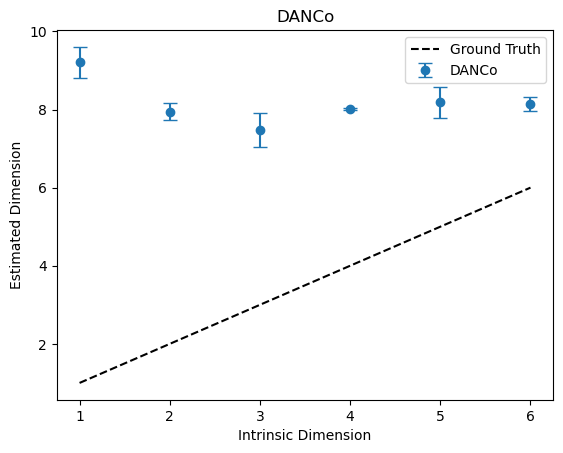

In [152]:
mean_dim = np.mean(id_estimates["DANCo"], axis=1)
std_dim = np.std(id_estimates["DANCo"], axis=1)


plt.xlabel("Intrinsic Dimension")
plt.ylabel("Estimated Dimension")
plt.title("DANCo")

plt.errorbar(dimensions, mean_dim, yerr=std_dim, fmt="o", label="DANCo", capsize=5)
plt.plot(dimensions, dimensions, "k--", label="Ground Truth")
plt.legend()

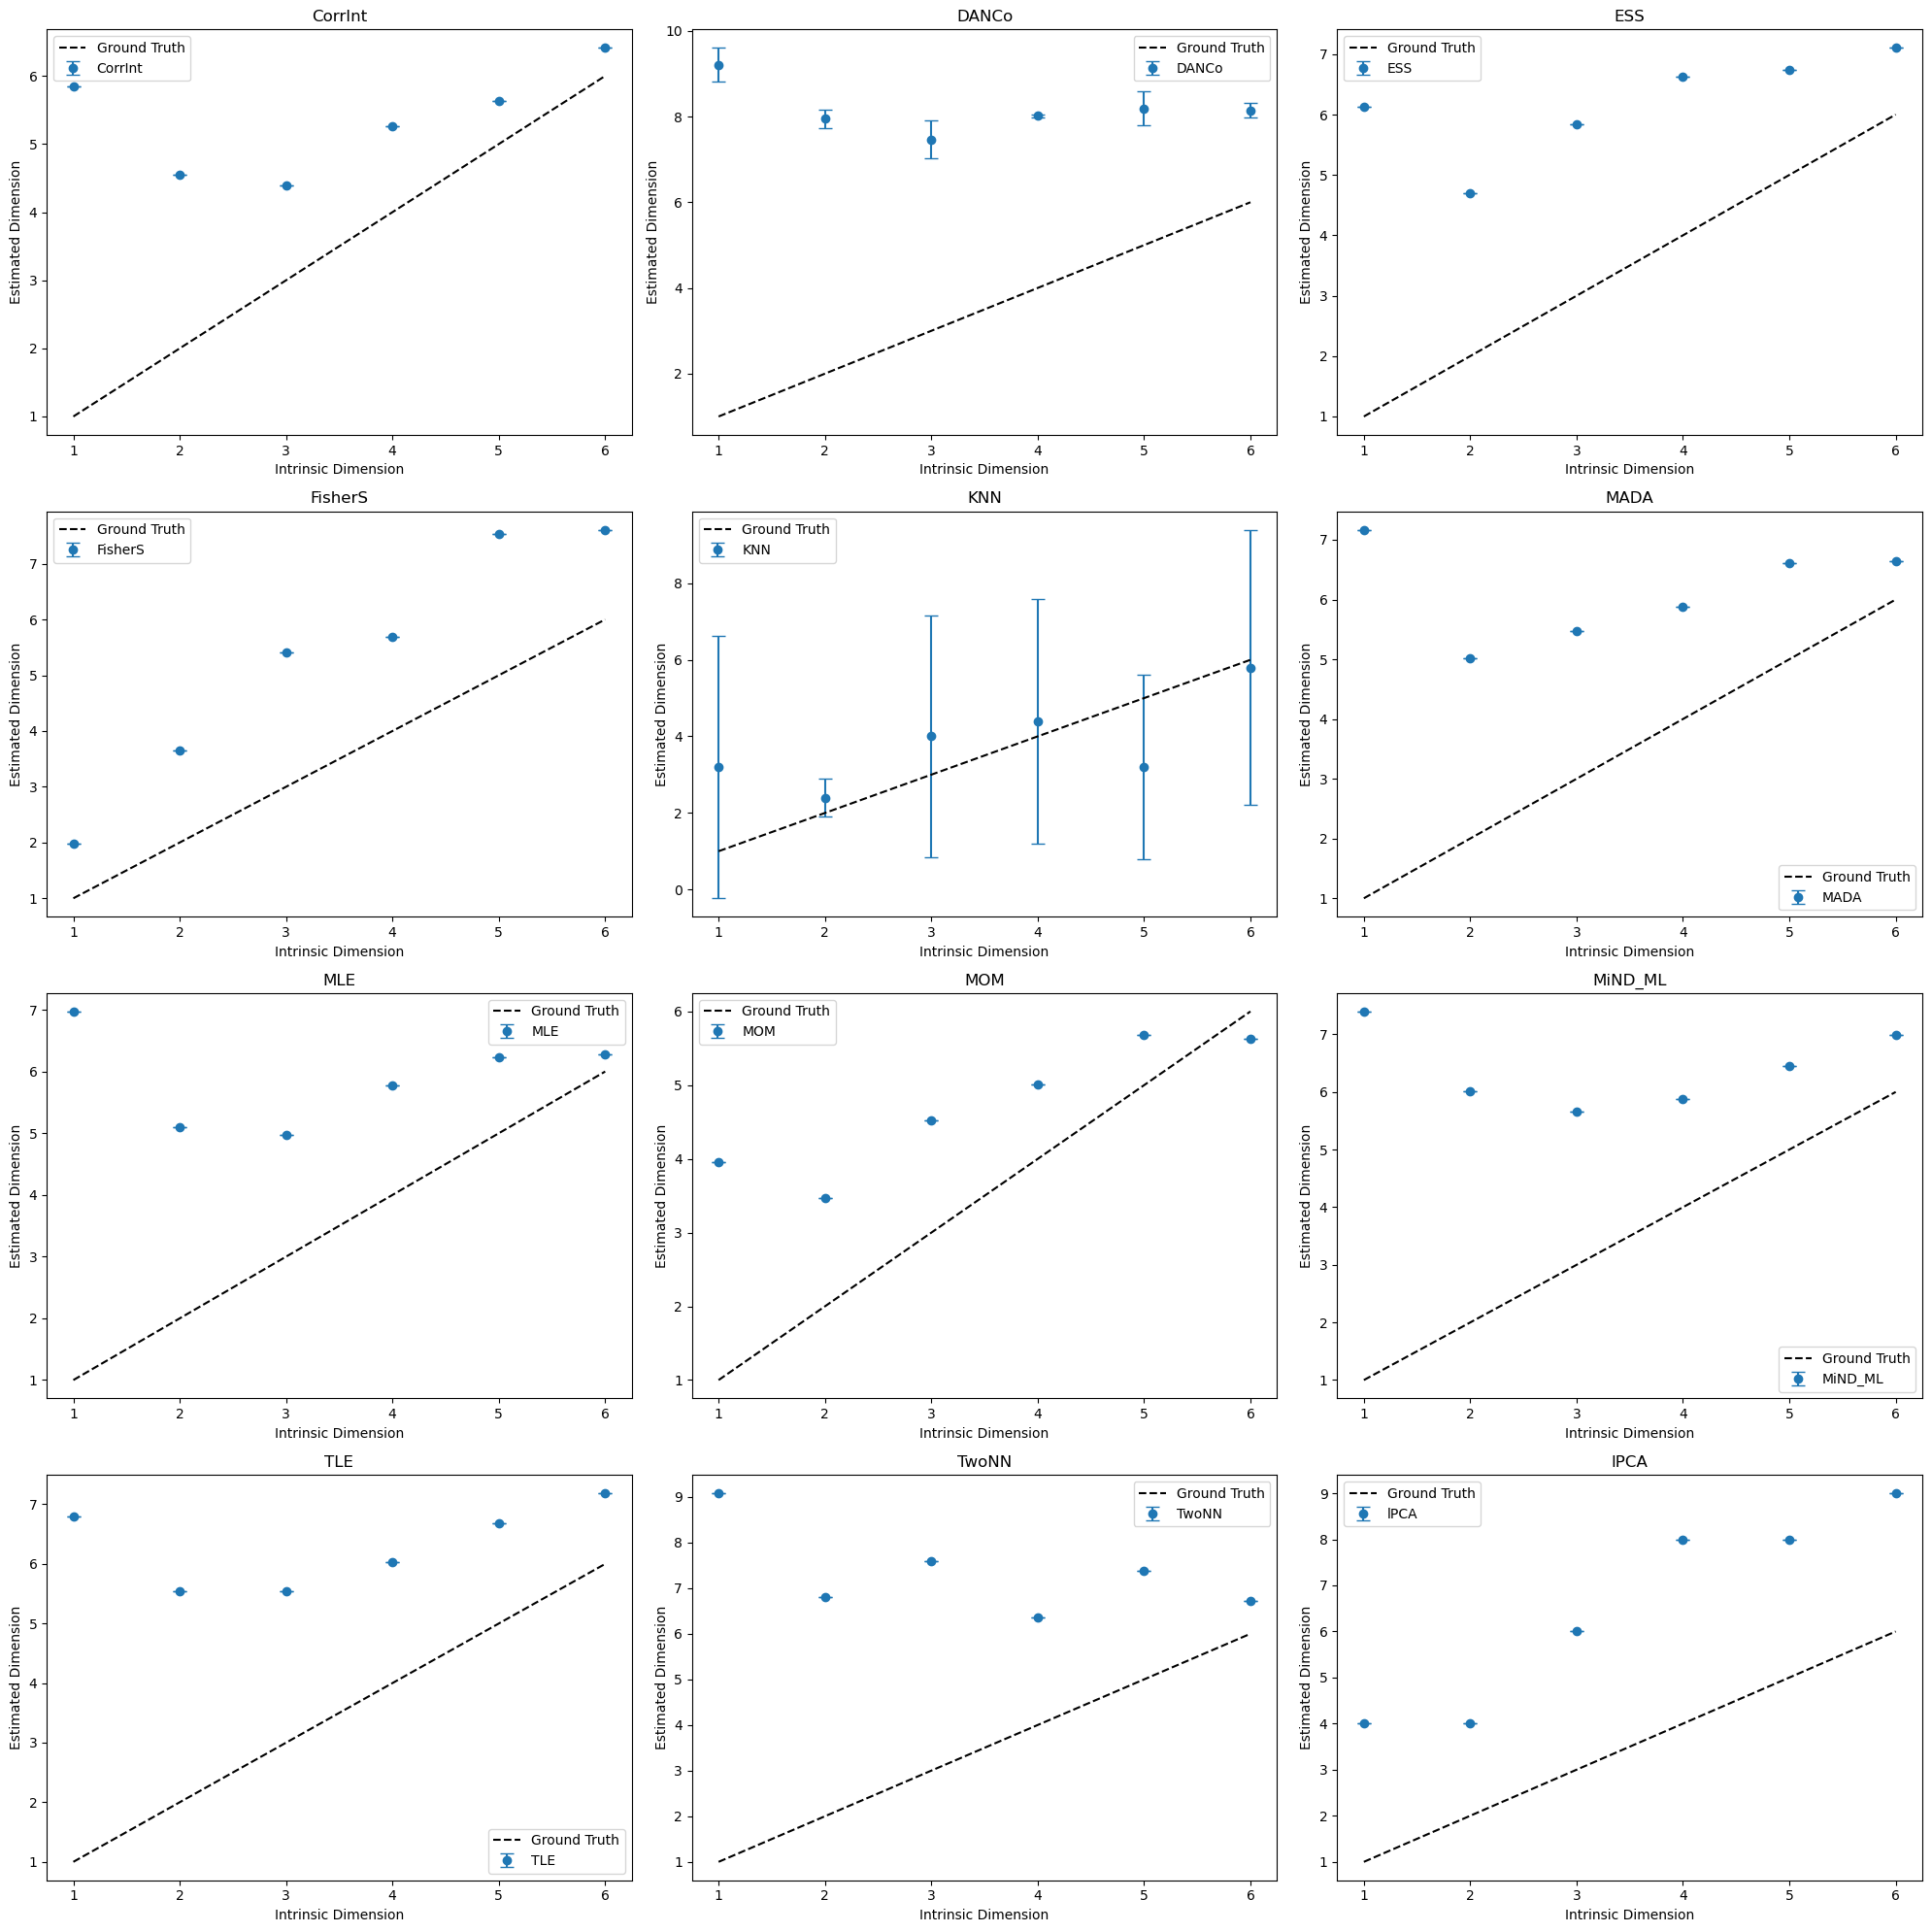

In [156]:
import matplotlib.pyplot as plt
import numpy as np


# Number of methods
num_methods = len(id_estimates)

# Creating a subplot grid - adjust the number of rows and columns as needed
rows = int(np.ceil(np.sqrt(num_methods)))
cols = int(np.ceil(num_methods / rows))

# Creating the figure
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

# Looping through each method to create subplots
for i, (method, estimates) in enumerate(id_estimates.items()):
    ax = axs[i // cols, i % cols]  # Determine the position of the current subplot
    mean_dim = np.mean(estimates, axis=1)
    std_dim = np.std(estimates, axis=1)

    # Plotting
    ax.errorbar(dimensions, mean_dim, yerr=std_dim, fmt="o", label=method, capsize=5)
    ax.plot(dimensions, dimensions, "k--", label="Ground Truth")
    ax.set_xlabel("Intrinsic Dimension")
    ax.set_ylabel("Estimated Dimension")
    ax.set_title(method)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [157]:
from neurometry.dimension.dimension import skdim_dimension_estimation

In [163]:
num_points = 100
num_neurons = 10

dimensions = [1, 2, 3]

id_estimates_2 = skdim_dimension_estimation(
    ["MLE", "lPCA"], dimensions, 100, num_points, num_neurons
)

In [164]:
id_estimates_2

{'MLE': array([[6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.32497212, 6.32497212, 6.32497212, 6.32497212,
         6.32497212, 6.3249